## **Business Intelligence Analyst Test**


Aline, the Business Intelligence Analyst at Corredores Davivienda, extracted
some information for her project with the Customer Experience Area. She saved all the information in the file "Contact_Data.csv"

In the file, you will find all the email interactions between Corredores
Davivienda employees and clients. Each row in the dataset corresponds to an email between a sender and a receiver. The description of the dataset is as follows:

➔ Fecha: The date when the email was sent or received.

➔ Hora: The time of the day when the email was sent or received.

➔ Correo_fuente: The email of the person who sent the email.

➔ Correo_destino: The email of the person who received the email.

➔ asunto_correo: The subject of the email.

➔ recepcion_correo: It indicates if the email was sent or received by the
Corredores Davivienda employee.

➔ lista_difusion: It indicates if the email was sent by a diffusion list.

➔ id_correo: Unique identification number of the email. It is the same number for every email, regardless of the receivers in the same email.


## Data Engineering


* **When Aline was analyzing the dataset, she discovered that some dates are in a different format. Unify all dates with the format "YYYYMMDD". Besides, she
discovered that the date and time had a different time zone (London Time).
Fix the problem by creating new variables: FIXED_DATE and FIXED_TIME
with the Bogota time zone.**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil.parser import parse
from datetime import datetime
from itertools import product
import pytz
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv("/content/Contact_Data.csv",sep="|")

Analyzing the dataset, I see 3 data in the column rows that have the character "!" and do not have relevant information, for this reason the data is filtered.

In [ ]:
df=df[df["fecha"]!="!"]

first I unified the format

In [ ]:
df["fecha_aux"]=pd.to_datetime(df["fecha"],errors='coerce')
df.loc[df["fecha_aux"].isna(),["fecha_aux"]]=list(df[df['fecha_aux'].isna()]["fecha"].apply(lambda x: datetime.strptime(x,"%b %d year=%Y")))
df["fecha"]=df["fecha_aux"].dt.strftime('%Y%m%d')

and fixed the data time zone

In [ ]:
df["FIXED_DATE"]=pd.to_datetime(df["fecha_aux"]+pd.to_timedelta(df["hora"]))
df.drop("fecha_aux",axis=1,inplace=True)
london=pytz.timezone('Europe/London')
bogota=pytz.timezone('America/Bogota')
df["FIXED_DATE"]=df["FIXED_DATE"].dt.tz_localize(london).dt.tz_convert(bogota)
df["FIXED_TIME"]=df["FIXED_DATE"].dt.strftime('%H:%M:%S.%f')
df["FIXED_DATE"]=df["FIXED_DATE"].dt.strftime('%Y%m%d')

In [ ]:
df

,fecha,hora,correo_fuente,correo_destino,asunto_correo,recepcion_correo,lista_difucion,id_correo,FIXED_DATE,FIXED_TIME
0,20230223,23:08:04.738154,jquiasua@corredores.com,lyperez@corredores.com,NaN,Enviado,NO,<CANk3ttMRwQ8CDGij4O4QNHmtSzrEcx-wCBsVAwz3LSiL...,20230223,18:08:04.738154
1,20230221,03:28:20.778185,jgarzon@corredores.com,jecristancho@corredores.com,NaN,Recibido,NO,<63f43a54.050a0220.58e64.a6d6SMTPIN_ADDED_MISS...,20230220,22:28:20.778185
2,20230221,03:28:20.779765,jgarzon@corredores.com,amendoza@corredores.com,NaN,Recibido,NO,<63f43a54.050a0220.58e64.a6d6SMTPIN_ADDED_MISS...,20230220,22:28:20.779765
3,20230221,03:28:20.776365,jgarzon@corredores.com,fondosdevalores@corredores.com,NaN,Recibido,NO,<63f43a54.050a0220.58e64.a6d6SMTPIN_ADDED_MISS...,20230220,22:28:20.776365
4,20230221,03:28:20.778954,jgarzon@corredores.com,jarango@corredores.com,NaN,Recibido,NO,<63f43a54.050a0220.58e64.a6d6SMTPIN_ADDED_MISS...,20230220,22:28:20.778954
...,...,...,...,...,...,...,...,...,...,...
1617251,20230222,20:27:12.601365,servicioalcliente@corp.homecenter.com.co,sbeltran@corredores.com,🧽Desinfecta y limpia tu hogar con los producto...,Recibido,SI,<9b48985a-ae98-4804-b00b-828fdc6ac790@ind1s06m...,20230222,15:27:12.601365
1617252,20230221,23:12:03.380167,info@drops.com.co,jmendez@corredores.com,🧽Utiliza el Desengrasante Multipropósito🧡 para...,Recibido,SI,<E1020005-1745F9D2470DE977-7B11A340@shopify.com>,20230221,18:12:03.380167
1617253,20230221,21:45:08.174315,info@drops.com.co,yardila@corredores.com,🧽Utiliza el Desengrasante Multipropósito🧡 para...,Recibido,SI,<E1020005-1745F513F01FC3E0-0E38675D@shopify.com>,20230221,16:45:08.174315
1617254,20230221,23:11:21.703708,info@drops.com.co,nhernandez@corredores.com,🧽Utiliza el Desengrasante Multipropósito🧡 para...,Recibido,SI,<E1020005-1745F9C3EE196989-C71616D7@shopify.com>,20230221,18:11:21.703708


### * **Which date had the highest number of sent emails? How many emails?**




First, I'm going to show a list of the dates where there are more records of sent emails.

In [ ]:
df["FIXED_DATE"].value_counts()

20230213    153599
20230214    153037
20230217    149960
20230223    149907
20230222    149570
20230215    148666
20230224    144672
20230220    144594
20230216    139226
20230221    135424
20230225     52055
20230218     48519
20230219     24793
20230212     23231
Name: FIXED_DATE, dtype: int64

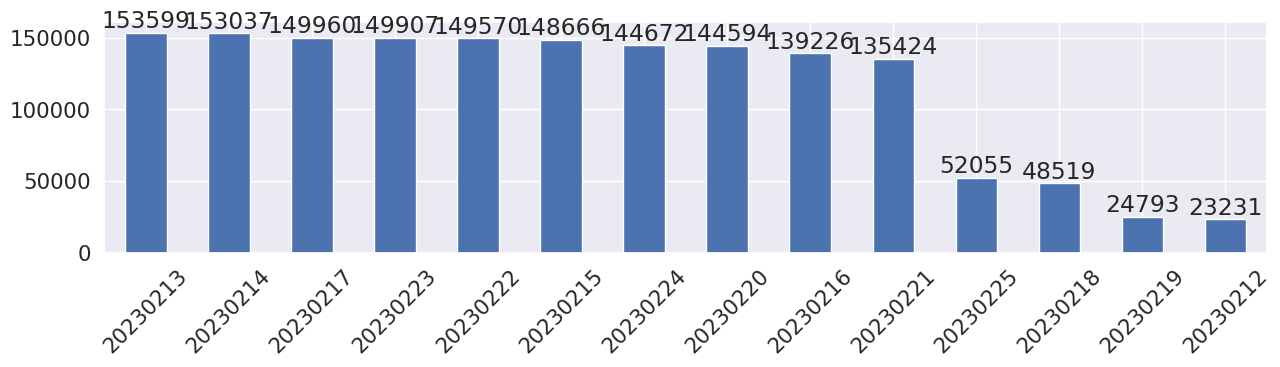

In [ ]:
ax = df["FIXED_DATE"].value_counts().plot(kind='bar', figsize=(15, 3))
plt.xticks(rotation=45)
ax.bar_label(ax.containers[-1], label_type='edge')
plt.show()

 **R: according to Bogota time zone, 2023/02/13 is the date that had the most emails sent with 153.599 emails in all data**

But if you want to know the date you had the most emails sent by the Corredores Davivienda employees

In [ ]:
df_sent_employes=df[df["recepcion_correo"]=="Enviado"]
df_sent_employes["FIXED_DATE"].value_counts()

20230214    16935
20230213    16835
20230215    16259
20230223    15682
20230224    15593
20230217    15572
20230222    15500
20230216    15250
20230220    14634
20230221    14348
20230219      145
20230212      105
20230218       72
20230225       50
Name: FIXED_DATE, dtype: int64

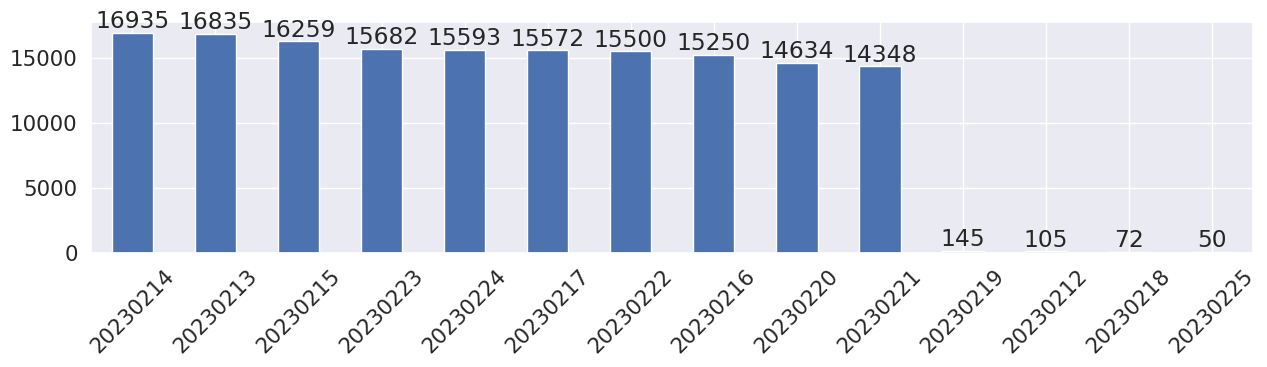

In [ ]:
ax = df_sent_employes["FIXED_DATE"].value_counts().plot(kind='bar', figsize=(15, 3))
plt.xticks(rotation=45)
ax.bar_label(ax.containers[-1], label_type='edge')
plt.show()

 **R: according to Bogota time zone, 2023/02/13 is the date that had the most emails sent with 16.935 emails by Corredores Davivienda**

### * Was the highest number of emails received in the morning (0h-12h) or in the afternoon (12h-24h)?

In [ ]:
print("Emails recived in the morning : " + str(len(df[("0"<=df["FIXED_TIME"]) & (df["FIXED_TIME"]<="12")])))
print("Emails recived in the afternoon : " + str(len(df[("12"<df["FIXED_TIME"]) & (df["FIXED_TIME"]<="24")])))

Emails recived in the morning : 823563
Emails recived in the afternoon : 793690


 R: according to Bogota time zone,the highest number of emails received is
in the morning (0h-12h) with 823.563 emails in the dataset

But if you want to know  highest number of emails received by Corredores Davivienda employees in the morning (0h-12h) or in the afternoon (12h-24h)?

In [ ]:
df_received_employes=df[df["recepcion_correo"]=="Recibido"]
print("Emails recived by Corredores daviviendsa employes in the morning : " + str(len(df_received_employes[("0"<=df_received_employes["FIXED_TIME"]) & (df_received_employes["FIXED_TIME"]<="12")])))
print("Emails recived by Corredores daviviendsa employes the afternoon : " + str(len(df_received_employes[("12"<df_received_employes["FIXED_TIME"]) & (df_received_employes["FIXED_TIME"]<="24")])))

Emails recived by Corredores daviviendsa employes in the morning : 747920
Emails recived by Corredores daviviendsa employes the afternoon : 712350


 R: according to Bogota time zone,the highest number of emails received is
in the morning (0h-12h) with 747.920 emails by corredores Davvienda employes

### Which email received the most emails? Which email sent the most emails?
How many emails? Which email wrote the most emails (remember that the
same email can be sent to different emails)?

In [ ]:
df["correo_destino"].value_counts()

cecheverria@corredores.com    115380
davicash@corredores.com        62485
bbeltran@corredores.com        54787
ebeltran@corredores.com        54652
mcanon@corredores.com          54376
                               ...  
ofelia.carmona@gmail.com           1
cdfalconi@gmail.com                1
luztemolina@gmail.com              1
pabelu02@gmail.com                 1
Wospina@corredores.com             1
Name: correo_destino, Length: 8242, dtype: int64

R: cecheverria@corredores.com received the most emails with 115.131 emails

In [ ]:
df["correo_fuente"].value_counts()

pagos@ecollect.co                  441540
MULTICASH@CORREDORES.COM           121126
boletin@primerapagina.com.co        51910
administrador@corredores.com        39223
NotificacionesWM@corredores.com     32904
                                    ...  
yamile.barragan@gmail.com               1
leidykatik@hotmail.com                  1
christinasewerin@yahoo.com              1
blancogadriana@gmail.com                1
info@toystyle.co                        1
Name: correo_fuente, Length: 12516, dtype: int64

R: pagos@ecollect.co sent the most emails with 441.540 emails

In [ ]:
df[df["lista_difucion"]=="NO"]["correo_fuente"].value_counts()

pagos@ecollect.co                            321020
MULTICASH@CORREDORES.COM                      88422
NotificacionesWM@corredores.com               32904
centreon@corredores.com                       31278
notificaciones@corredores.com                 22664
                                              ...  
mayra.alejandra1.ramirezgarzon@citi.com           1
creditoeducativo@pichincha.com.co                 1
alescoba@uniandes.edu.co                          1
hasbun1958@hotmail.com                            1
contacto@email.pernod-ricard-colombia.com         1
Name: correo_fuente, Length: 10590, dtype: int64

R: pagos@ecollect.co wrote the most emails with 321.023 emails

* **An intern email is an email sent and received by Corredores Davivienda
employees. Which email sent the most intern emails? What are the
employees' emails who interacted the highest number of times?**

In [ ]:
df_sent_employes["correo_fuente"].value_counts()[:10]

riesgos@corredores.com         2890
lespinosa@corredores.com       2758
cmartinezc@corredores.com      2499
ivelez@corredores.com          2497
csalcedo@corredores.com        2151
fmdaza@corredores.com          2117
mherrera@corredores.com        1974
njimenez@corredores.com        1954
atovar@corredores.com          1918
derivadosope@corredores.com    1695
Name: correo_fuente, dtype: int64

R: riesgos@corredores.com sent the most intern emails

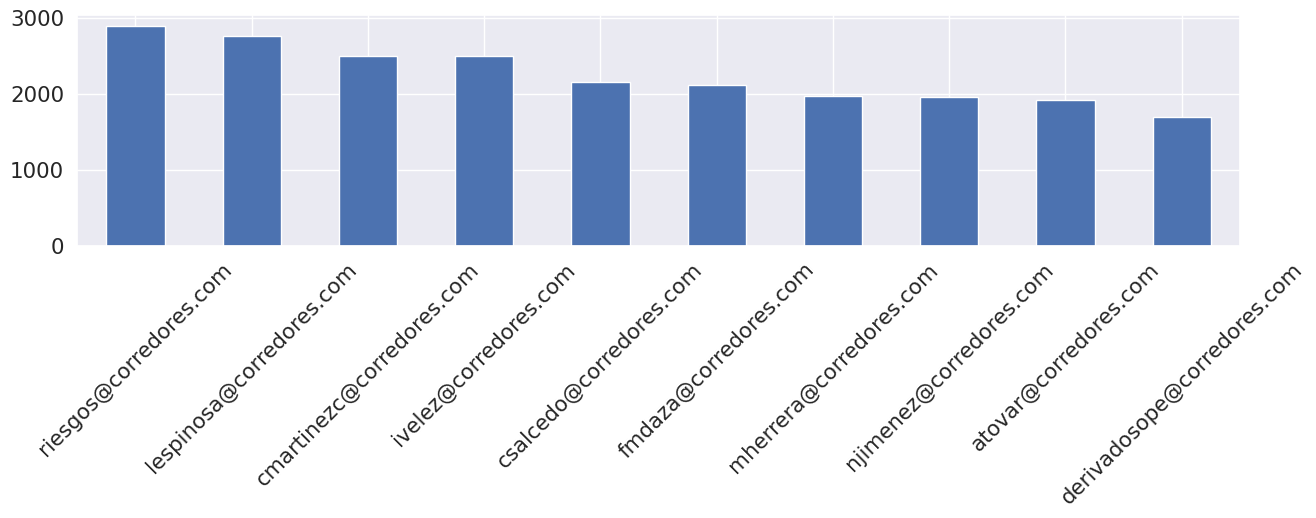

In [ ]:
plt.figure(figsize=(15, 3))
df_sent_employes["correo_fuente"].value_counts()[:10].plot(kind='bar')
plt.xticks(rotation=45)
plt.show()

R: riesgos@corredores.com, lespinosa@corredores.com, cmartinezc@corredores.com, ivelez@corredores.com, csalcedo@corredores.com, fmdaza@corredores.com, mherrera@corredores.com, njimenez@corredores.com,atovar@corredores.com,derivadosope@corredores.com are emails who interacted the highest number of times

### Which email had the highest increase in the number of emails sent between two consecutive days? When was that date? Is the result different if the change between Sunday and Monday is not considered? What is the new result?

In [ ]:
def email_had_more_increase(df,exce=" "):
  df_num_emails_sent=pd.DataFrame()
  #create a exception variable, in this case if Monday is selected, it is not considered between Sunday and Monday

  #Create a new Dataframe that containing the number of emails sent in a day for each email adress
  for _ in df["fecha"].sort_values().unique():
    df_aux=pd.DataFrame()
    df_aux["correo_fuente"]=df[df["fecha"]==_]["correo_fuente"].value_counts().keys().tolist()
    df_aux["num_emails"]=df[df["fecha"]==_]["correo_fuente"].value_counts().tolist()
    df_aux.insert(0,"fecha",_)
    df_num_emails_sent=pd.concat([df_num_emails_sent,df_aux],ignore_index=True)
  df_num_sent_iter = pd.DataFrame(list(product(df_num_emails_sent.fecha.unique(), df_num_emails_sent.correo_fuente.unique())), columns =['fecha', 'correo_fuente'])
  df_num_emails_sent=pd.merge(df_num_sent_iter,df_num_emails_sent,on=["fecha","correo_fuente"],how="left")
  df_num_emails_sent.fillna(0,inplace=True)

  #caluculate diff and search the email and the date who haves max diff in two consecutive days

  df_num_emails_sent["Day_of_week"]=pd.to_datetime(df_num_emails_sent["fecha"]).apply(lambda x: x.strftime('%A'))

  max_dif=0
  for _ in df_num_emails_sent["correo_fuente"].unique():
    diff=df_num_emails_sent[df_num_emails_sent["correo_fuente"]==_]
    #create a filter to identify the not considered day
    filter=diff[diff["Day_of_week"]==exce].index.to_list()
    diff=diff["num_emails"].diff().fillna(0)
    #delete the operation where the filter is present
    for i in filter:
      diff.pop(i)
    max=diff.max()
    if max>max_dif:
      max_dif=max
      date_max=df_num_emails_sent.loc[diff.idxmax(),"fecha"]
      email=df_num_emails_sent.loc[diff.idxmax(),"correo_fuente"]

  print("the email had the highest increase in the number of emails sent between two consecutive days is "+ email)
  print("the date of the highest increase in the number of emails sent between two consecutive days is "+ date_max)


In [ ]:
email_had_more_increase(df)

the email had the highest increase in the number of emails sent between two consecutive days is pagos@ecollect.co
the date of the highest increase in the number of emails sent between two consecutive days is 20230213


R:

the email had the highest increase in the number of emails sent between two consecutive days is pagos@ecollect.co between 2023/02/12 and 2023/02/13



In [ ]:
email_had_more_increase(df,exce="Monday")

the email had the highest increase in the number of emails sent between two consecutive days is reenviojpg@corredores.com
the date of the highest increase in the number of emails sent between two consecutive days is 20230222


R: If the change between Sunday and Monday is not considered

the email had the highest increase in the number of emails sent between two consecutive days is reenviojpg@corredores.com between 2023/02/21 and 2023/02/22

## Business Intelligence

### ● Aline wants to perform an exploratory data analysis of the information to draw conclusions based on the data. Create a Dashboard in the tool that you prefer. Show the most relevant information that you consider important for the stakeholders to make decisions.

first we filter the data needed to create the dashboard and export it

In [ ]:
df_export=df.copy()
df_export.drop(["fecha","hora","asunto_correo","lista_difucion","id_correo","recepcion_correo"],axis=1,inplace=True)
df_export["FIXED_TIME"]=df_export["FIXED_TIME"].apply(lambda x: x[0:2])
df_export["FIXED_TIME"]=pd.to_numeric(df_export["FIXED_TIME"])
df_export["FIXED_DATE"]=pd.to_datetime(df_export["FIXED_DATE"])


In [ ]:
df_export.to_csv("Dashboard_data.csv",index=False)

In [ ]:
df_export

,correo_fuente,correo_destino,FIXED_DATE,FIXED_TIME
0,jquiasua@corredores.com,lyperez@corredores.com,2023-02-23,18
1,jgarzon@corredores.com,jecristancho@corredores.com,2023-02-20,22
2,jgarzon@corredores.com,amendoza@corredores.com,2023-02-20,22
3,jgarzon@corredores.com,fondosdevalores@corredores.com,2023-02-20,22
4,jgarzon@corredores.com,jarango@corredores.com,2023-02-20,22
...,...,...,...,...
1617251,servicioalcliente@corp.homecenter.com.co,sbeltran@corredores.com,2023-02-22,15
1617252,info@drops.com.co,jmendez@corredores.com,2023-02-21,18
1617253,info@drops.com.co,yardila@corredores.com,2023-02-21,16
1617254,info@drops.com.co,nhernandez@corredores.com,2023-02-21,18


## Data Modeling

Margarita, the Customer Experience specialist, believes that this information
can be used to segment the external emails. Do you agree with Margarita?
Why? Develop a segmentation model to classify the external emails, using the
variables that you consider appropriate. How can you measure the
performance of your segmentation model?

I agree with margarita because exploring the data, I have seen that the subject of external emails contains repetitive words that I can use to segment external emails or spam emails.

First, we clean the data and assign a numeric variable to identify whether the subject is from an internal or external email, , this numeric variable can be obtained from the email address sent.

In [ ]:
df_modeling=df.copy()
df_modeling=df_modeling.drop(["fecha","hora","correo_destino","recepcion_correo","lista_difucion","id_correo","FIXED_DATE","FIXED_TIME"],axis=1)
df_modeling.dropna(inplace=True)


In [ ]:
df_modeling["correo_fuente"]=df_modeling["correo_fuente"].apply(lambda x:x.upper())
df_modeling["clase"]=df_modeling["correo_fuente"].apply(lambda x: 1 if "@CORREDORES.COM" in x else 0)
df_modeling=df_modeling.drop("correo_fuente",axis=1)

In [ ]:
df_modeling


,asunto_correo,clase
559,\nLecciones de un año de guerra,0
560,"Angela, esta semana tenemos lo mejor de Pr...",0
561,"Angela, esta semana tenemos lo mejor de Pr...",0
562,"Angela, esta semana tenemos lo mejor de Pr...",0
563,"Angela, esta semana tenemos lo mejor de Pr...",0
...,...,...
1617251,🧽Desinfecta y limpia tu hogar con los producto...,0
1617252,🧽Utiliza el Desengrasante Multipropósito🧡 para...,0
1617253,🧽Utiliza el Desengrasante Multipropósito🧡 para...,0
1617254,🧽Utiliza el Desengrasante Multipropósito🧡 para...,0


We can see that the subject contains emojis and this may affect the model.

remove emojis

In [ ]:
import re
def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"
        u"\U0001F300-\U0001F5FF"
        u"\U0001F680-\U0001F6FF"
        u"\U0001F1E0-\U0001F1FF"
        u"\U00002500-\U00002BEF"
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

And we can normailize the data

In [ ]:
df_modeling["asunto_correo"]=df_modeling["asunto_correo"].apply(lambda x: remove_emojis(x))
df_modeling["asunto_correo"]=df_modeling["asunto_correo"].apply(lambda x: x.replace("\n",""))
df_modeling["asunto_correo"]=df_modeling["asunto_correo"].apply(lambda x: x.lower())


to guarantee the randomness of our data, we make a mix of them, also our dataset is very large and this can cause problems in the model, so we take a fraction of the datast

In [ ]:
df_0_class=df_modeling[df_modeling["clase"]==0]
df_1_class=df_modeling[df_modeling["clase"]==1]

proportion=70000/len(df_modeling)

df_0_class=df_0_class.sample(frac=proportion,random_state=42)
df_1_class=df_1_class.sample(frac=proportion,random_state=42)

df_modeling=pd.concat([df_0_class,df_1_class])


In [ ]:
df_modeling

,asunto_correo,clase
1286896,ecollect: frubana 1001300000024900 frubana sas...,0
235232,especie omnibus saliente,0
183239,delivery status notification (failure),0
1064226,transaccion transferencias a bancolombia ha si...,0
1398470,ecollect: karennomaira parraga karennomaira pa...,0
...,...,...
477359,informacion fondo 800154697-c-fondo de inversi...,1
159616,cuentas deposito (bandeja tareas de grupo),1
1096635,validar error para el job p_procesos_nocturnos...,1
443062,informacion fondo 800154697-a-fondo de inversi...,1


In [ ]:
df_modeling.clase.value_counts()

1    38663
0    31337
Name: clase, dtype: int64

with our data ready we can do the modeling, in this case, we are going to try SVM (Support Vector Machine) and Naave Bayes which are algorithms used for text classification.

### Naive Bayes

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_modeling["asunto_correo"], df_modeling["clase"], test_size=0.2, random_state=42,stratify=df_modeling["clase"])

we can use scikit-learn's CountVectorizer to create the Bag-of-Words representation of the text data, i.e. converting the texts into feature vectors by counting the frequency of each word

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

vectorizer= CountVectorizer(ngram_range=(1,2)).fit(X_train)
X_train_vectorized =vectorizer.transform(X_train)
X_train_vectorized.toarray().shape

model=MultinomialNB(alpha=0.1)
model.fit(X_train_vectorized,y_train)

predictions= model.predict(vectorizer.transform(X_test))

to measure the performance of the segmentation model we have different options, first we can make a confusion matrix to see the true positive, true negative, false positive, false negative predictions.

<Axes: >

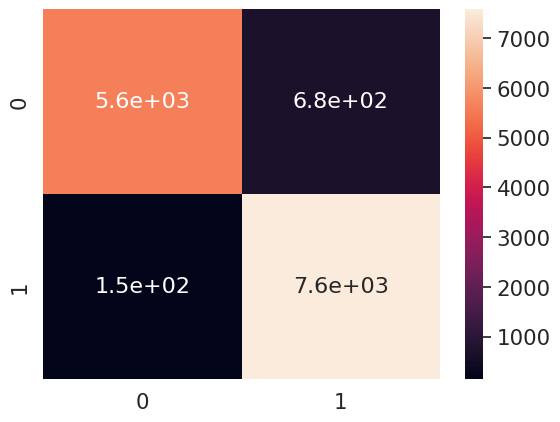

In [ ]:
from sklearn import metrics
array = metrics.confusion_matrix(y_test, predictions)
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df_cm = pd.DataFrame(array)

sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})

the proportion of true predictions is more than the wrong predictions, we can calculate, acuracy and recall in our model

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

print("the accuracy from Nave Bayes model is "+ str(accuracy_score(y_test, predictions)))
print("the recall from Nave Bayes model is "+ str(recall_score(y_test, predictions)))

the accuracy from Nave Bayes model is 0.9405
the recall from Nave Bayes model is 0.9806026121815595


and we can make an ROC curve representing the rate of true positives(TRP) and false positives(TRP) along with its area under the curve(AUC) representing the overall performance of the model.

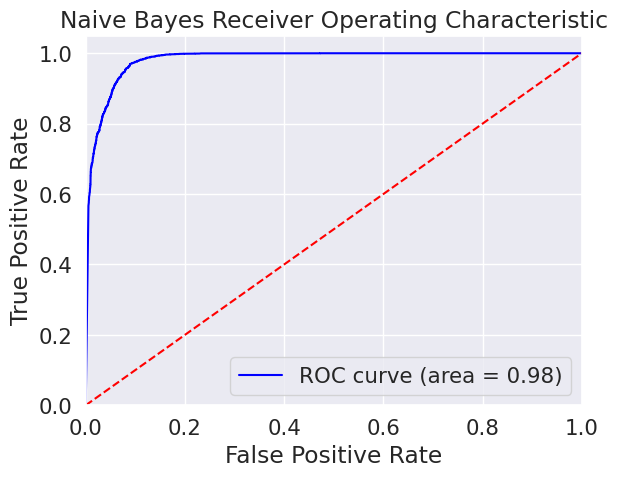

In [ ]:
from sklearn.metrics import roc_curve,auc

y_pred_proba=model.predict_proba(vectorizer.transform(X_test))[:, 1]

fpr,tpr,thresholds=roc_curve(y_test,y_pred_proba)
roc_auc = auc(fpr, tpr)
# Graficar la curva ROC
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle= '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naive Bayes Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

And Modeling and compare the results with oher model, in this case is a Suport vector machine

## SVM

In [ ]:
from sklearn.svm import SVC
model_svm=SVC(C=1.0,kernel="linear",probability=True)
model_svm.fit(X_train_vectorized,y_train)
y_pred_svm=model_svm.predict(vectorizer.transform(X_test))


In [ ]:
print("the accuracy from Nave Bayes model is "+str(accuracy_score(y_test, y_pred_svm)))
print("the recall from Nave Bayes model is "+ str(recall_score(y_test, y_pred_svm)))

the accuracy from Nave Bayes model is 0.9529285714285715
the recall from Nave Bayes model is 0.9676710203025992


<Axes: >

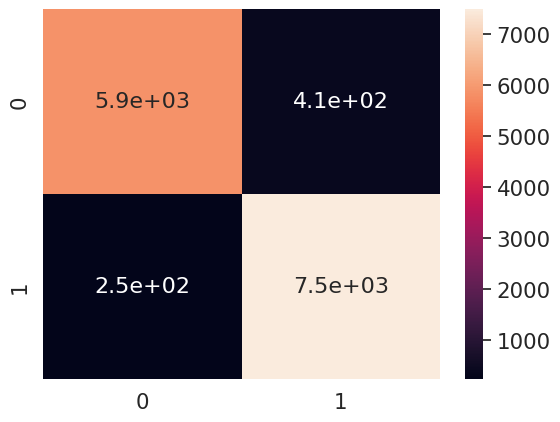

In [ ]:
array = metrics.confusion_matrix(y_test, y_pred_svm)
df_cm = pd.DataFrame(array)

sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})

the proportion of true predictions is more than the wrong predictions, we can calculate, acuracy and recall in our model

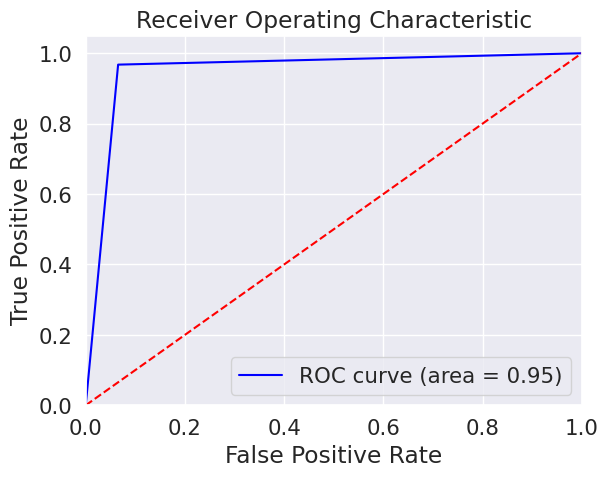

In [ ]:
from sklearn.metrics import roc_curve,auc

y_pred_proba=model_svm.predict_proba(vectorizer.transform(X_test))[:, 1]

fpr,tpr,thresholds=roc_curve(y_test,y_pred_svm)
roc_auc=auc(fpr,tpr)

roc_auc = auc(fpr, tpr)
# Graficar la curva ROC
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle= '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In conclusion, the Navie Bayes model is the best because its measures such as Recall, Acuracy and the ROC curve graphs and the confusion matrix can be said to be a good model and also has a very low computational cost and is very fast compared to SVM, although the SVM model obtained slightly better metrics but its computational cost is a little high, so if you want to deploy the model, the Naive Bayes is a perfect model